In [1]:
import torch
from flytracker import run

from flytracker.utils.param_helpers import load_frame, test_mask, test_threshold
from skimage.filters import threshold_local
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload 
%autoreload 2

In [2]:
# Location of movie
movie_path = "../../data/experiments/bruno/videos/seq_1.mp4"
image = load_frame(movie_path, frame=93935, color=False)

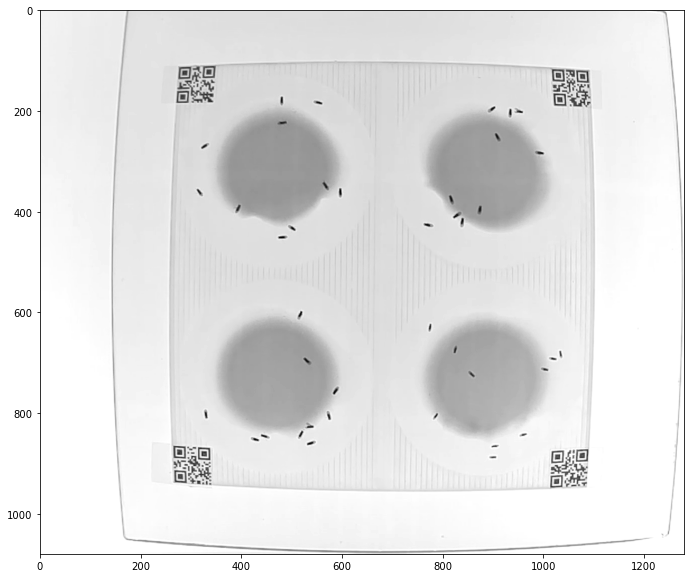

In [3]:
plt.figure(figsize=(15, 10))
plt.imshow(image, cmap='gray')

In [4]:
mask = torch.ones((1080, 1280), dtype=bool)
mask[:130, :] = 0
mask[-160:, :] = 0
mask[:, :270] = 0
mask[:, -205:] = 0

mask[:190, :350] = 0
mask[:195, -270:] = 0
mask[-220:, :340] = 0
mask[870:, 1010:] = 0

masked_image = test_mask(image, mask)

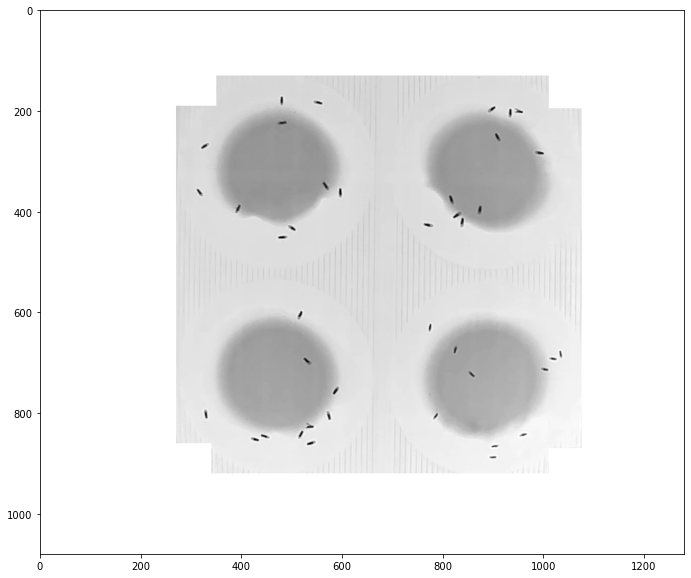

In [5]:
plt.figure(figsize=(15, 10))
plt.imshow(masked_image, cmap='gray')

In [6]:
def local_threshold(image, mask, threshold=50, block_size=31):
    background = threshold_local(image, block_size=block_size, method='median', )
    # we apply the mask after the background to avoid annoying edge effects
    background = test_mask(torch.tensor(background, dtype=torch.uint8), mask)
    return background - threshold 

In [7]:
local_threshold = local_threshold(image, mask, 40, 31) # feed in unmasked image!
global_threshold = 120

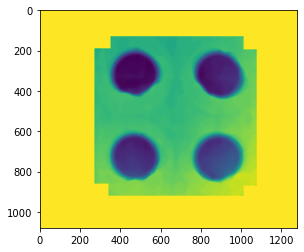

In [8]:
plt.imshow(local_threshold)

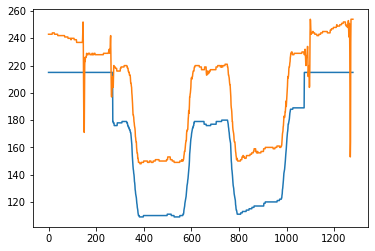

In [9]:
plt.plot(local_threshold[300, :])

plt.plot(image[300, :])

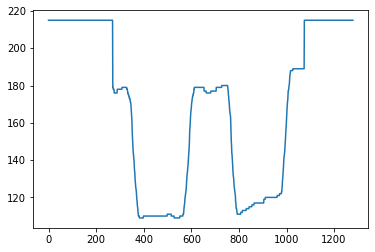

In [10]:
plt.plot(local_threshold[300, :])

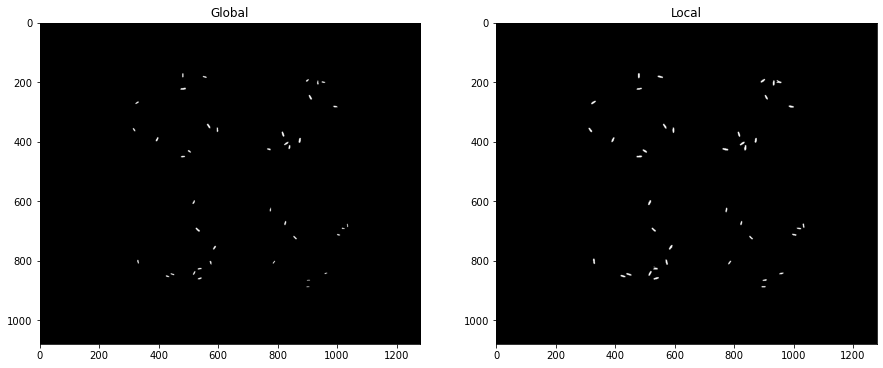

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title("Global")
plt.imshow(masked_image < global_threshold, cmap='gray')

plt.subplot(122)
plt.title("Local")
plt.imshow(masked_image < local_threshold, cmap='gray')

In [28]:
%%time
df = run(
    movie_path,
    mask,
    n_arenas=4,
    gpu=True,
    parallel=False,
    n_ini=100,
    threshold=local_threshold,
    n_frames=2000
)

/home/gert-jan/Documents/flyTracker/src/flytracker/tracker.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(threshold).to(device, non_blocking=True),


Done with frame 1000
Done with frame 2000
CPU times: user 2min 23s, sys: 420 ms, total: 2min 24s
Wall time: 8.86 s


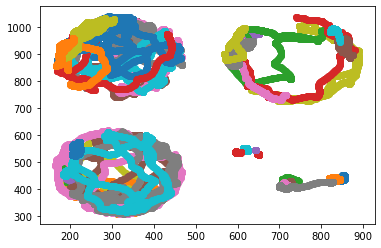

In [29]:
min_frame = 0
for ID in df.ID.unique():
    plt.plot(df.query(f"ID=={ID} and frame > {min_frame}")["x"], df.query(f"ID=={ID} and frame > {min_frame}")["y"], 'o')

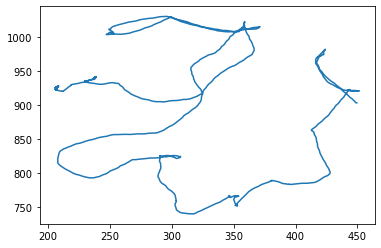

In [30]:
ID = 5
plt.plot(df.query(f"ID=={ID}")["x"], df.query(f"ID=={ID}")["y"])

In [31]:
n_flies = df.ID.unique().size
X = df[["x", "y"]].to_numpy().reshape(-1, n_flies, 2)

In [32]:
diff = np.max(np.linalg.norm(np.diff(X, axis=0), axis=-1), axis=-1)

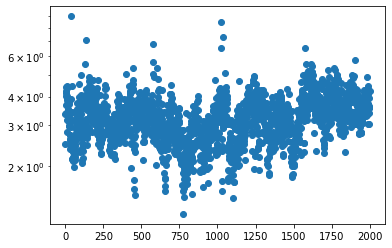

In [33]:
plt.semilogy(diff, 'o')

In [19]:
df

,frame,ID,x,y,arena
0,100,0,449.474182,903.088745,0
1,100,1,326.902069,1010.024902,0
2,100,2,320.332153,994.025818,0
3,100,3,266.891632,833.043396,0
4,100,4,255.123291,887.251953,0
...,...,...,...,...,...
395995,9999,35,624.249878,461.925049,3
395996,9999,36,616.483276,398.428589,3
395997,9999,37,598.987915,437.228912,3
395998,9999,38,706.322144,493.933411,3


In [23]:
a = np.inf

In [24]:
a is not np.inf

False